In [1]:
from rlforge.environments import ShortCorridor
from rlforge.agents.policy_gradient import REINFORCEAgent
from rlforge.experiments import ExperimentRunner

import matplotlib.pyplot as plt

In [2]:
env = ShortCorridor(observation_type='feature')
runs = 100

agent = REINFORCEAgent(num_actions=2, 
                       dims_ranges=((0.0, 1.0), (0.0, 1.0)),
                       alpha_theta=1e-3,         
                       alpha_w=None,              # Baseline step size (alpha^w) - Only used if baseline=True 
                       discount=0.99,
                       iht_size=1024, 
                       num_tilings=2, 
                       num_tiles=2, 
                       wrap_dims=(False,False),
                       baseline=False)

agent_baseline = REINFORCEAgent(num_actions=2, 
                                dims_ranges=((0.0, 1.0), (0.0, 1.0)),
                                alpha_theta=4e-3,          
                                alpha_w=1e-2,            
                                discount=0.99,
                                iht_size=1024, 
                                num_tilings=2, 
                                num_tiles=2, 
                                wrap_dims=(False,False),
                                baseline=True)

Run 1/100 - Episodes:   0%|          | 0/500 [00:00<?, ?it/s]

 Experiment Summary (Episodic)
Runs: 100
Average runtime per run: 0.233 seconds
Episodes per run (Max): 500
First episode mean reward: -10.440
Last episode mean reward: -4.140
Overall mean reward: -5.673
Mean reward (last 20 episodes): -4.263
First episode mean steps: 10.4
Last episode mean steps: 4.1
Overall mean steps: 5.7


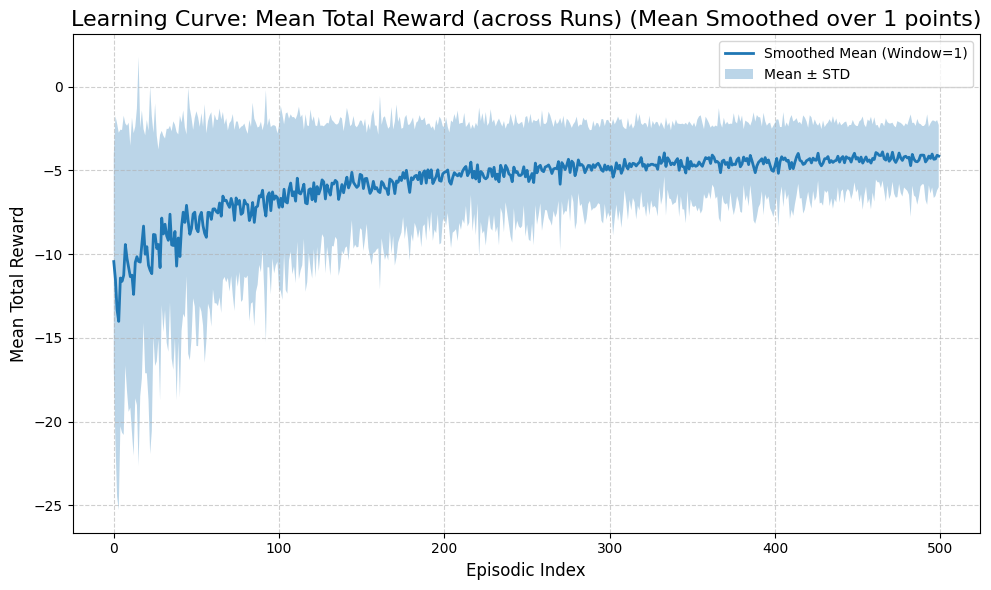

In [3]:
runner = ExperimentRunner(env, agent)

results = runner.run_episodic(
    num_runs=runs,
    num_episodes=500,
    max_steps_per_episode=100
)

rewards = results["mean_rewards"]
steps = results["mean_steps"]

runner.summary(last_n=20)
runner.plot_results(window_size=1)

 Experiment Summary (Episodic)
Runs: 100
Average runtime per run: 0.189 seconds
Episodes per run (Max): 500
First episode mean reward: -12.380
Last episode mean reward: -3.400
Overall mean reward: -4.181
Mean reward (last 20 episodes): -3.412
First episode mean steps: 12.4
Last episode mean steps: 3.4
Overall mean steps: 4.2


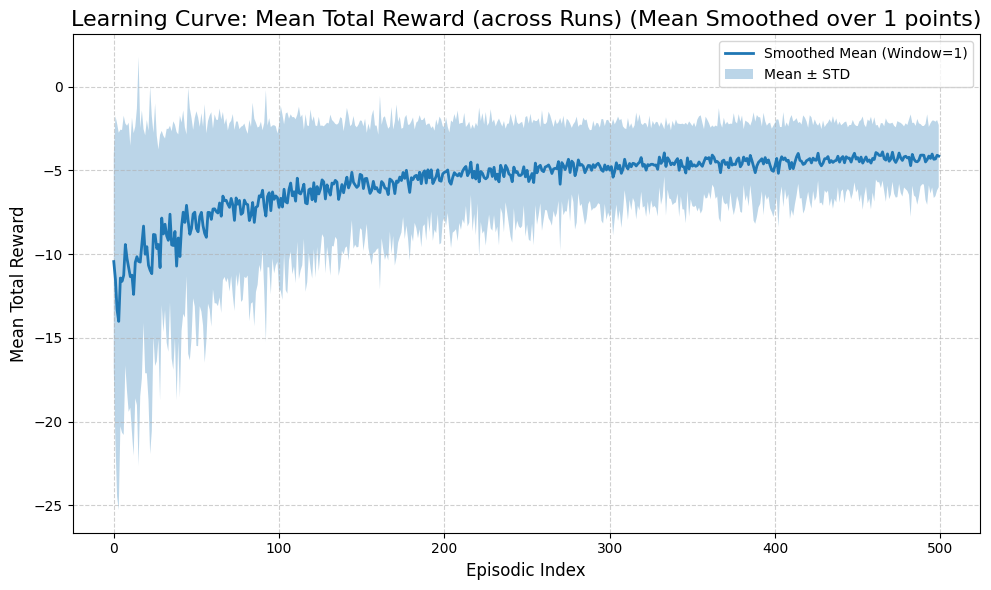

In [4]:
runner_baseline = ExperimentRunner(env, agent_baseline)

results = runner_baseline.run_episodic(
    num_runs=runs,
    num_episodes=500,
    max_steps_per_episode=100
)

rewards_baseline = results["mean_rewards"]
steps_baseline = results["mean_steps"]

runner_baseline.summary(last_n=20)
runner.plot_results(window_size=1)

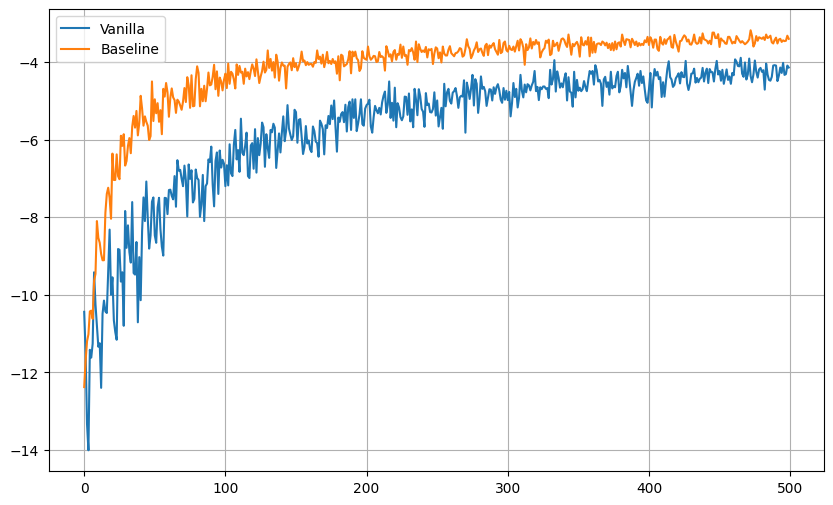

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.plot(rewards_baseline)
plt.legend(['Vanilla', 'Baseline'])
plt.grid()

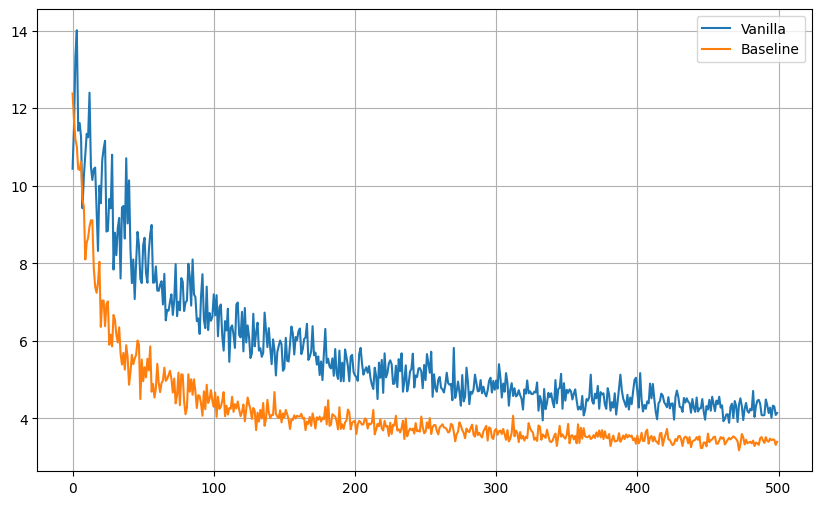

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(steps)
plt.plot(steps_baseline)
plt.legend(['Vanilla', 'Baseline'])
plt.grid()